# Finger Print Analyze by Smile data

In [1]:
# Library
import numpy as np
import pandas as pd
from pyADA import Smetrics
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
# Import data
data = pd.read_csv('Dados_Tratados_Full_kOH.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,names,smiles,kOH
0,5-Methylfuran-2-carbaldehyde,Cc1oc(C=O)cc1,7.200000e+09
1,"(2,2-dimethyl-3H-1-benzofuran-7-yl) N-methylca...",CNC(=O)Oc1cccc2CC(C)(C)Oc12,3.200000e+09
2,"(2S,5R,6R)-3,3-dimethyl-7-oxo-6-[(2-phenylacet...",CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...,7.940000e+09
3,"2,2,2-TRIFLUOROETHANOL",OCC(F)(F)F,2.300000e+08
4,"N'-ethyl-6-methylsulfanyl-N-propan-2-yl-1,3,5-...",CCNc1nc(NC(C)C)nc(SC)n1,2.600000e+10


In [3]:
smiles = data.iloc[:,1]

In [4]:
# Topological finger prints
ms = [Chem.MolFromSmiles(s) for s in smiles]
fps = [Chem.RDKFingerprint(x) for x in ms]
fps_top = []
for fp in fps:
    fps_top.append([m for m in fp])
fps_top = np.asmatrix(fps_top)
fps_top

matrix([[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [5]:
# MACCS Keys finger print
from rdkit.Chem import MACCSkeys
fps = [MACCSkeys.GenMACCSKeys(x) for x in ms]
fps_MACCS = []
for fp in fps:
    fps_MACCS.append([m for m in fp])
fps_MACCS = np.asmatrix(fps_MACCS)
fps_MACCS

matrix([[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [6]:
# Morgan finger print
bi = {}
fps = [AllChem.GetMorganFingerprintAsBitVect(j, 2, bitInfo=bi, nBits=1024) for j in ms]
fps_Morgan = []
for fp in fps:
    fps_Morgan.append([m for m in fp])
fps_Morgan = np.asmatrix(fps_Morgan)
fps_Morgan

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]])

In [7]:
# Data frame Morgan FP
df_fp = pd.DataFrame(fps_Morgan)
data_Morgan = pd.concat([data, df_fp], axis=1)
data_Morgan.shape

(1374, 1027)

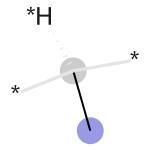

In [8]:
from rdkit.Chem import Draw
frag = Draw.DrawMorganBit(ms[2], 272, bi, useSVG=True)
frag

In [10]:
# Log scale
data2 = data_Morgan
Scale = Smetrics()
data2['kOH'] = Scale.rescale_ln(data2['kOH'].values)
data2.head()


,names,smiles,kOH,0,1,2,3,4,5,6,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,5-Methylfuran-2-carbaldehyde,Cc1oc(C=O)cc1,22.697347,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(2,2-dimethyl-3H-1-benzofuran-7-yl) N-methylca...",CNC(=O)Oc1cccc2CC(C)(C)Oc12,21.886417,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"(2S,5R,6R)-3,3-dimethyl-7-oxo-6-[(2-phenylacet...",CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...,22.795179,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,"2,2,2-TRIFLUOROETHANOL",OCC(F)(F)F,19.253590,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"N'-ethyl-6-methylsulfanyl-N-propan-2-yl-1,3,5-...",CCNc1nc(NC(C)C)nc(SC)n1,23.981362,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Save DF in .csv
data2.to_csv('KOH_FP_Morgan.csv')

## ML Methods

In [12]:
# predictor and Class
preditores = data2.iloc[:,3:].values
classe = data2.iloc[:,2].values
preditores

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [13]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(preditores, classe, test_size=0.33, random_state=131)

### RandomForest Regressor

In [14]:
random_forest = RandomForestRegressor() 

In [15]:
# Train 
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test) 
y_pred

array([22.92259126, 21.15607412, 22.4775466 , 22.42762226, 23.16373952,
       22.76334728, 19.75921035, 22.3956744 , 22.51748085, 23.37996391,
       21.97960907, 21.18173392, 22.30249   , 21.42234871, 21.35495871,
       21.63342405, 22.56239452, 22.70466744, 21.27145679, 19.69833253,
       22.06039291, 22.43118715, 20.63022205, 20.77191125, 21.52088638,
       22.89977685, 21.90253678, 22.2132607 , 19.22640072, 22.16571843,
       22.29596904, 22.11881509, 21.17175324, 22.62498303, 21.1964952 ,
       19.78733865, 22.93367907, 19.75951289, 21.31914847, 23.01693189,
       22.48875141, 19.09687847, 22.16987421, 22.50251585, 22.64163102,
       21.46331217, 22.8448644 , 22.60022035, 17.81523196, 20.79810975,
       22.44497797, 22.61557963, 21.40133413, 22.16804995, 22.50242892,
       22.55971601, 22.50156922, 22.5690031 , 23.20568178, 19.57319772,
       21.04082699, 22.50924218, 22.70777657, 21.28074471, 22.51949556,
       22.1133585 , 22.84307991, 22.61820999, 20.93547921, 21.72

In [16]:
# R²(interno)
score = random_forest.score(X_train, y_train)
score

0.9361524791825132

In [17]:
# Q² externo
Myanal = Smetrics()
Myanal.Q2ext(y_test,y_pred,y_train)

0.6298704763945004